In [ ]:
# Using Numpy

# Download dataset
import numpy as np
import tensorflow as tf 
DATA_URL = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)


# Extract train and test examples
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']

# Create train and test datasets out of the examples
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices(test_examples)

for feat, targ in train_dataset.take(2):
  print('Features shape: {}, Target: {}'.format(feat.shape, targ))



11493376/11490434 [==============================] - 0s 0us/step
Features shape: (28, 28), Target: 5
Features shape: (28, 28), Target: 0


In [ ]:
# Using Pandas
import pandas as pd

csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')
df = pd.read_csv(csv_file)

df.head()

16384/13273 [=====================================] - 0s 0us/step


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
target = df.pop('target')

dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [ ]:
for feat, targ in dataset.take(5):
  print('Features: {}, Target: {}'.format(feat, targ))

Features: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Features: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Features: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Features: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Features: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


In [ ]:
# Images data

import pathlib

DATA_URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_root_orig = tf.keras.utils.get_file(origin=DATA_URL, 
                                         fname='flower_photos',
                                         untar=True)

data_root = pathlib.Path(data_root_orig)

label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

print(label_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


3670


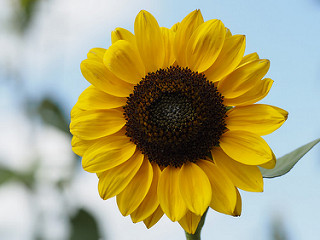

In [ ]:
 # Display a random sample from the loaded dataset

 import random
 import IPython.display as display

 all_image_paths = list(data_root.glob('*/*'))
 all_image_paths = [str(path) for path in all_image_paths]
 random.shuffle(all_image_paths)


 image_count = len(all_image_paths)
 print(image_count)

 image_path = random.choice(all_image_paths)
 display.display(display.Image(image_path))

# CSV

In [ ]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)

df = pd.read_csv(train_file_path, sep=',')
df.head()

32768/30874 [===============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
NUMERIC_FEATURES = ['age', 'n_siblings_spouses', 'parch', 'fare']
dense_df = df[NUMERIC_FEATURES]
dense_df.head()

,age,n_siblings_spouses,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,28.0,0,0,8.4583


In [ ]:
numeric_columns = []

for feature in NUMERIC_FEATURES:
  num_col = tf.feature_column.numeric_column(feature)
  numeric_columns.append(num_col)

In [ ]:
numeric_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class': ['First', 'Second', 'Third'],
    'deck': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town': ['Cherbourg', 'Southampton', 'Queenstown'],
    'alone': ['y', 'n']
}

In [ ]:
cat_df = df[list(CATEGORIES.keys())]

cat_df.head()

,sex,class,deck,embark_town,alone
0,male,Third,unknown,Southampton,n
1,female,First,C,Cherbourg,n
2,female,Third,unknown,Southampton,y
3,female,First,C,Southampton,n
4,male,Third,unknown,Queenstown,y


In [ ]:
categorical_columns = []

for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
      key=feature, vocabulary_list=vocab
  )

  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [ ]:
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

# Text (Loading texts with TextLineDataset)

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'

FILE_NAME = 'cowper.txt'

file_path = tf.keras.utils.get_file(FILE_NAME, 
                                    origin=DIRECTORY_URL + FILE_NAME)

lines_dataset = tf.data.TextLineDataset(file_path)

for text_data in tfds.as_numpy(lines_dataset.take(3)):
  print(text_data.decode('utf-8'))

﻿Achilles sing, O Goddess! Peleus' son;
His wrath pernicious, who ten thousand woes
Caused to Achaia's host, sent many a soul


# TFRecord (Reading TFRecord files)

In [ ]:
 filenames = [tf_record_filename]

 raw_dataset = tf.data.TFRecordDataset(filenames)

 feature_description = {
     'feature1': tf.io.FixedLenFeature((), tf.string),
     'feature2': tf.io.FixedLenFeature((), tf.int64)
 }

 for raw_record in raw_dataset.take(1):
   example = tf.io.parse_single_example(raw_record, feature_descriptions)
   print(example)

# Generators (Keras ImageDataGenerator)

In [ ]:
def make_generator():
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  rotation_range=20,
                                                                  zoom_range=[0.8, 1.2])
  
  train_generator = train_datagen.flow_from_directory(catsdogs, 
                                                      target_size=(224, 224),
                                                      class_mode='categorical',
                                                      batch_size=32)
  
  return train_generator

train_generator = tf.data.Dataset.from_generator(
    make_generator, (tf.float32, tf.uint8)
)

# Loading Datasets with TensorFlow

In [ ]:
# Fetch the numpy dataset

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf.keras.datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)


# Extract train, test sets

with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

# Load them with tf.data
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

# Apply transformations like batch, shuffle to the dataset
train_dataset = train_dataset.shuffle(100).batch(64)
test_dataset = test_dataset.batch(64)


X, y = next(iter(train_dataset))

input_shape = X.numpy().shape[1:]

# Create a simple sequential model comprising of a Dense layer
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10)

# Pandas Identifying Heart Disease

In [ ]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')

df = pd.read_csv(csv_file)
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

target = df.pop('target')

dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

train_dataset = dataset.shuffle(len(df)).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=15)

Epoch 1/15

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

10/10 [==============================] - 0s 2ms/step - loss: 18.4668 - accuracy: 0.2739
Epoch 2/15
10/10 [==============================] - 0s 2ms/step - loss: 7.9571 - accuracy: 0.2739
Epoch 3/15
10/10 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.6568
Epoch 4/15
10/10 [==============================] - 0s 2ms/step - loss: 1.7026 - accuracy: 0.7261
Epoch 5/15
10/10 [==============================] - 0s 2ms/step - loss: 1.2403 - accuracy: 0.7327
Epoch 6/15
10/10 

In [ ]:
dict_slices = tf.data.Dataset.from_tensor_slices((df.to_dict('list'),
                                                  target.values)).batch(16)

for features, target in tfds.as_numpy(dict_slices.take(1)):
  for (feature, value), label in zip(features.items(), target):
    print('{} = {}\t Label = {}'.format(feature, value, label))

age = [63 67 67 37 41 56 62 57 63 53 57 56 56 44 52 57]	 Label = 0
sex = [1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1]	 Label = 1
cp = [1 4 4 3 2 2 4 4 4 4 4 2 3 2 3 3]	 Label = 0
trestbps = [145 160 120 130 130 120 140 120 130 140 140 140 130 120 172 150]	 Label = 0
chol = [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168]	 Label = 0
fbs = [1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]	 Label = 0
restecg = [2 2 2 0 2 0 2 0 2 2 0 2 2 0 0 0]	 Label = 1
thalach = [150 108 129 187 172 178 160 163 147 155 148 153 142 173 162 174]	 Label = 0
exang = [0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0]	 Label = 1
oldpeak = [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 0.4 1.3 0.6 0.  0.5 1.6]	 Label = 0
slope = [3 2 2 3 1 1 3 1 2 3 2 2 2 1 1 1]	 Label = 0
ca = [0 3 2 0 0 0 2 0 1 0 0 0 1 0 0 0]	 Label = 0
thal = [2 3 4 3 3 3 3 3 4 4 2 3 2 4 4 3]	 Label = 1


In [ ]:
# Training the model (Functional)

# Constructing the inputs for all the dense features
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}

x = tf.stack(list(inputs.values()), axis=-1)
x = tf.keras.layers.Dense(10, activation='relu')(x)

# The single output denoting the target's probability
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(dict_slices, epochs=15)

Epoch 1/15
19/19 [==============================] - 0s 2ms/step - loss: 27.9904 - accuracy: 0.2904
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 14.6772 - accuracy: 0.4059
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 10.3422 - accuracy: 0.5545
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 9.4680 - accuracy: 0.5974
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 8.3452 - accuracy: 0.5776
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 7.2412 - accuracy: 0.5941
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 6.3350 - accuracy: 0.5908
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 5.6598 - accuracy: 0.5974
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 5.1501 - accuracy: 0.5941
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 4.6983 - accuracy: 0.5974
Epoch 11/15
19/1

# Images Classifying species of flowers

In [ ]:
DATA_URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_root_orig = tf.keras.utils.get_file(origin=DATA_URL,
                                         fname='flower_photos', untar=True)

data_root = pathlib.Path(data_root_orig)

# Load all the file paths in the directory
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

# Gather the list of labels and create a labelmap
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

label_to_index = dict((name, index) for index, name in enumerate(label_names))

# Use the label map to fetch all categorical labels
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]


# Preprocessing and creating the dataset
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
label_ds = tf.data.Dataset.from_tensor_slices(all_imabes_labels)

def preprocess_image(path):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0 # normalize to [0, 1] range
  return image

image_ds = path_ds.map(preprocess_image)
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))



# Training the model
BATCH_SIZE = 32
ds = image_label_ds.shuffle(
    buffer_size=len(all_image_paths)).repeat().batch(BATCH_SIZE)

steps_per_epoch = tf.math.ceil(len(all_image_paths) / BATCH_SIZE).numpy()

model.fit(ds, epochs=1, steps_per_epochs=steps_per_epoch)

